In [28]:
import pandas as pd

# Charger les fichiers CSV avec un séparateur de point-virgule
data_2023 = pd.read_csv('energy_data2023.csv', sep=';', parse_dates=['datetime'])
data_2024 = pd.read_csv('energy_data2024.csv', sep=';', parse_dates=['datetime'])
data_2025 = pd.read_csv('energy_data2025.csv', sep=';', parse_dates=['datetime'])

# Vérifier les premières lignes des données pour s'assurer qu'elles ont été correctement chargées
print(data_2023.head())
print(data_2024.head())
print(data_2025.head())


           datetime  PrévisionsJ-1  PrévisionsJ  Consommation
0  01/01/2023 00:00        46800.0      48000.0       46008.0
1  01/01/2023 00:15        46050.0      47500.0       46462.0
2  01/01/2023 00:30        45500.0      47000.0       45349.0
3  01/01/2023 00:45        44650.0      46350.0       44669.0
4  01/01/2023 01:00        43800.0      45700.0       45387.0
           datetime  PrévisionsJ-1  PrévisionsJ  Consommation
0  01/01/2024 00:00        53567.0        53500       54033.0
1  01/01/2024 00:15        53533.0        54400       54488.0
2  01/01/2024 00:30        53600.0        52600       53501.0
3  01/01/2024 00:45        53600.0        52600       52102.0
4  01/01/2024 01:00        52800.0        51300       51292.0
           datetime  PrévisionsJ-1  PrévisionsJ  Consommation
0  01/01/2025 00:00        57711.0      63667.0       64354.0
1  01/01/2025 00:15        57122.0      64233.0       64521.0
2  01/01/2025 00:30        62700.0      63100.0       63715.0
3  01/01

In [29]:
# Fusionner les données pour les trois années
data = pd.concat([data_2023, data_2024, data_2025], ignore_index=True)

# Vérifier les premières lignes après fusion
print(data.head())


           datetime  PrévisionsJ-1  PrévisionsJ  Consommation
0  01/01/2023 00:00        46800.0      48000.0       46008.0
1  01/01/2023 00:15        46050.0      47500.0       46462.0
2  01/01/2023 00:30        45500.0      47000.0       45349.0
3  01/01/2023 00:45        44650.0      46350.0       44669.0
4  01/01/2023 01:00        43800.0      45700.0       45387.0


In [30]:
# Vérifier s'il y a des valeurs manquantes
print(data.isnull().sum())

# Si des valeurs manquantes existent, vous pouvez les supprimer ou les imputer
data = data.dropna()  # Supprimer les lignes avec des valeurs manquantes


datetime           0
PrévisionsJ-1    380
PrévisionsJ      286
Consommation     476
dtype: int64


In [31]:
# Vérifier les colonnes et les types de données
print(data.dtypes)

# Afficher les premières lignes pour inspecter les données
print(data.head())


datetime          object
PrévisionsJ-1    float64
PrévisionsJ      float64
Consommation     float64
dtype: object
           datetime  PrévisionsJ-1  PrévisionsJ  Consommation
0  01/01/2023 00:00        46800.0      48000.0       46008.0
1  01/01/2023 00:15        46050.0      47500.0       46462.0
2  01/01/2023 00:30        45500.0      47000.0       45349.0
3  01/01/2023 00:45        44650.0      46350.0       44669.0
4  01/01/2023 01:00        43800.0      45700.0       45387.0


In [32]:
# Supprimer les lignes contenant des valeurs manquantes
data_cleaned = data.dropna()

# Vérifier les valeurs manquantes après suppression
print(data_cleaned.isnull().sum())


datetime         0
PrévisionsJ-1    0
PrévisionsJ      0
Consommation     0
dtype: int64


In [33]:
# Imputer les valeurs manquantes en utilisant la méthode "forward fill" (propagation de la dernière valeur connue)
data_filled = data.fillna(method='ffill')

# Ou en utilisant la méthode "backward fill"
# data_filled = data.fillna(method='bfill')

# Vérifier les valeurs manquantes après imputation
print(data_filled.isnull().sum())


datetime         0
PrévisionsJ-1    0
PrévisionsJ      0
Consommation     0
dtype: int64


C:\Users\Louis\AppData\Local\Temp\ipykernel_15816\3979914301.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Axes: >

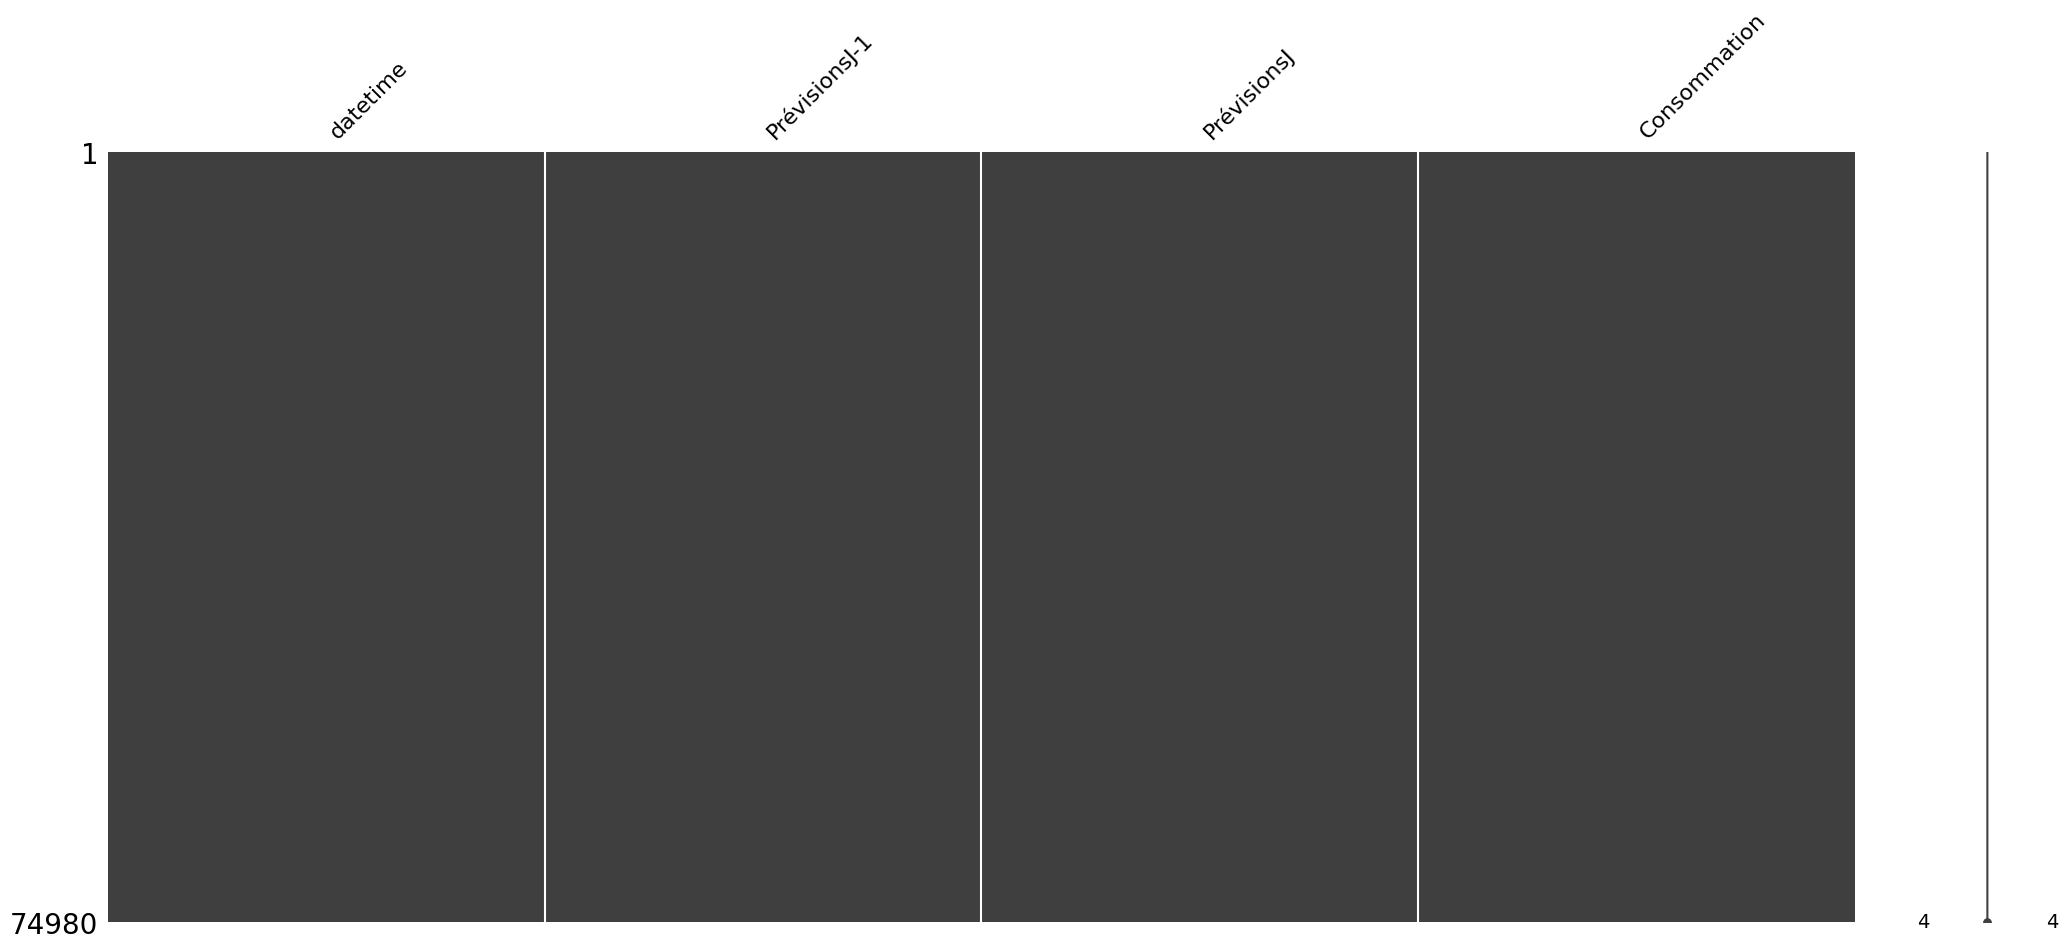

In [34]:
import missingno as msno

# Visualiser les valeurs manquantes
msno.matrix(data)


In [35]:
# Conversion de la colonne 'datetime' en type datetime
data['datetime'] = pd.to_datetime(data['datetime'], format='%d/%m/%Y %H:%M')

# Vérifier que la conversion a bien fonctionné
print(data.dtypes)
print(data.head())


datetime         datetime64[ns]
PrévisionsJ-1           float64
PrévisionsJ             float64
Consommation            float64
dtype: object
             datetime  PrévisionsJ-1  PrévisionsJ  Consommation
0 2023-01-01 00:00:00        46800.0      48000.0       46008.0
1 2023-01-01 00:15:00        46050.0      47500.0       46462.0
2 2023-01-01 00:30:00        45500.0      47000.0       45349.0
3 2023-01-01 00:45:00        44650.0      46350.0       44669.0
4 2023-01-01 01:00:00        43800.0      45700.0       45387.0


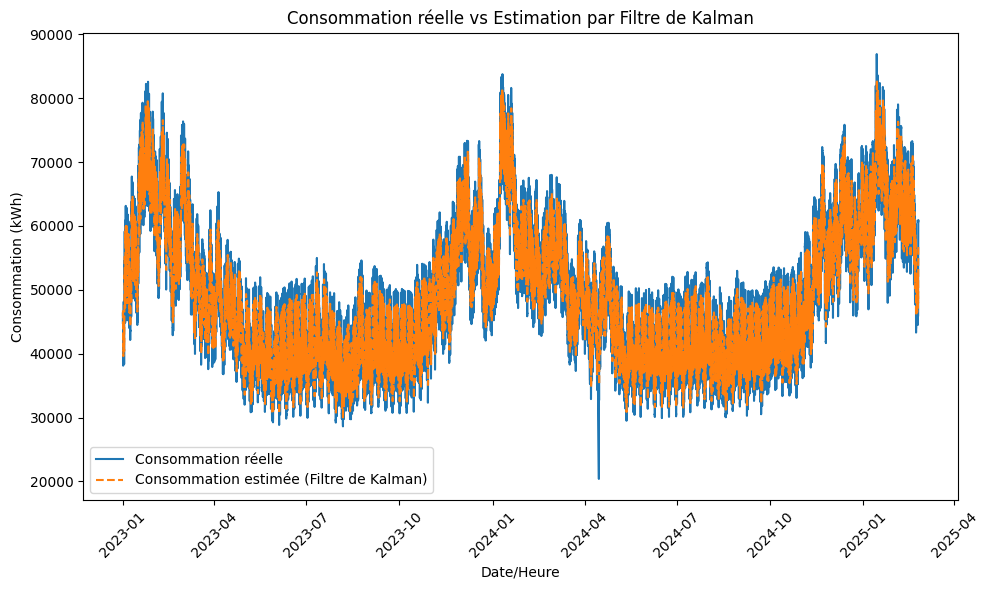

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation
n = len(data)  # Nombre d'observations
x_hat = np.zeros(n)  # Estimations du filtre de Kalman
P = np.zeros(n)  # Covariance de l'estimation
x_hat[0] = data['PrévisionsJ-1'].iloc[0]  # Estimation initiale (peut être ajustée)
P[0] = 1  # Covariance initiale (peut être ajustée)
R = 100  # Variance de la mesure (à ajuster)
Q = 1  # Variance du bruit du processus (à ajuster)
F = 1  # Matrice de transition (peut être ajustée)
H = 1  # Matrice de mesure (peut être ajustée)

# Application du filtre de Kalman
for t in range(1, n):
    # Prediction (estimation à partir du précédent état)
    x_hat[t] = F * x_hat[t-1]  # Prédiction de l'état
    P[t] = F * P[t-1] * F + Q  # Mise à jour de la covariance

    # Mise à jour avec la nouvelle observation
    K = P[t] * H / (H * P[t] * H + R)  # Gain de Kalman
    x_hat[t] = x_hat[t] + K * (data['Consommation'].iloc[t] - H * x_hat[t])  # Mise à jour de l'estimation
    P[t] = (1 - K * H) * P[t]  # Mise à jour de la covariance

# Ajouter les résultats du filtre de Kalman au DataFrame
data['Consommation_Kalman'] = x_hat

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.plot(data['datetime'], data['Consommation'], label='Consommation réelle')
plt.plot(data['datetime'], data['Consommation_Kalman'], label='Consommation estimée (Filtre de Kalman)', linestyle='--')
plt.xlabel('Date/Heure')
plt.ylabel('Consommation (kWh)')
plt.legend()
plt.title('Consommation réelle vs Estimation par Filtre de Kalman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(data['Consommation'], data['Consommation_Kalman']))
print(f"RMSE (Erreur quadratique moyenne) : {rmse}")


RMSE (Erreur quadratique moyenne) : 2764.4199364104797


In [ ]:
"""
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Charger les données (remplacez ceci par vos propres données)
data = pd.read_csv('energy_data2023.csv', sep=';', parse_dates=['datetime'], dayfirst=True)

# Convertir explicitement les dates avec un format spécifique
data['datetime'] = pd.to_datetime(data['datetime'], format='%d/%m/%Y %H:%M')

# Initialisation (identique à l'exemple précédent)
n = len(data)
x_hat = np.zeros(n)
P = np.zeros(n)
x_hat[0] = data['PrévisionsJ-1'].iloc[0]  # Estimation initiale
P[0] = 1  # Covariance initiale
R = 100  # Variance de la mesure
Q = 1  # Variance du bruit du processus
F = 1  # Matrice de transition
H = 1  # Matrice de mesure

# Application du filtre de Kalman
for t in range(1, n):
    # Prediction
    x_hat[t] = F * x_hat[t-1]
    P[t] = F * P[t-1] * F + Q

    # Mise à jour
    K = P[t] * H / (H * P[t] * H + R)
    x_hat[t] = x_hat[t] + K * (data['Consommation'].iloc[t] - H * x_hat[t])
    P[t] = (1 - K * H) * P[t]

# Ajouter les résultats du filtre de Kalman au DataFrame
data['Consommation_Kalman'] = x_hat

# Création des traces pour Plotly
trace1 = go.Scatter(
    x=data['datetime'],
    y=data['Consommation'],
    mode='lines',
    name='Consommation réelle',
    line=dict(color='blue')
)

trace2 = go.Scatter(
    x=data['datetime'],
    y=data['Consommation_Kalman'],
    mode='lines',
    name='Estimation par Filtre de Kalman',
    line=dict(color='red', dash='dash')
)

# Layout du graphique
layout = go.Layout(
    title="Consommation réelle vs Estimation par Filtre de Kalman",
    xaxis=dict(title="Date/Heure"),
    yaxis=dict(title="Consommation (kWh)"),
    showlegend=True
)

# Création de la figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Affichage du graphique interactif
fig.show()
"""

'import numpy as np\nimport pandas as pd\nimport plotly.graph_objects as go\n\n# Charger les données (remplacez ceci par vos propres données)\ndata = pd.read_csv(\'energy_data2023.csv\', sep=\';\', parse_dates=[\'datetime\'], dayfirst=True)\n\n# Convertir explicitement les dates avec un format spécifique\ndata[\'datetime\'] = pd.to_datetime(data[\'datetime\'], format=\'%d/%m/%Y %H:%M\')\n\n# Initialisation (identique à l\'exemple précédent)\nn = len(data)\nx_hat = np.zeros(n)\nP = np.zeros(n)\nx_hat[0] = data[\'PrévisionsJ-1\'].iloc[0]  # Estimation initiale\nP[0] = 1  # Covariance initiale\nR = 100  # Variance de la mesure\nQ = 1  # Variance du bruit du processus\nF = 1  # Matrice de transition\nH = 1  # Matrice de mesure\n\n# Application du filtre de Kalman\nfor t in range(1, n):\n    # Prediction\n    x_hat[t] = F * x_hat[t-1]\n    P[t] = F * P[t-1] * F + Q\n\n    # Mise à jour\n    K = P[t] * H / (H * P[t] * H + R)\n    x_hat[t] = x_hat[t] + K * (data[\'Consommation\'].iloc[t] - H 

In [39]:
import plotly.io as pio

# Forcer le rendu dans le navigateur
pio.renderers.default = 'browser'

# Maintenant, réexécutez votre graphique
fig.show()
